# Data

In [6]:
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# df_2023=pd.read_csv('df_2023.csv')
# df_2024=pd.read_csv('df_2024_adjusted.csv')
df_22_24=pd.read_csv('..\data\df_2022_2024.csv')

df_22_24.index = pd.date_range(start='2022-11-01', periods=len(df_22_24), freq='H')

df_2023 = df_22_24.loc['2023-01-01':'2024-01-14'].copy()

# date_range_22_24= pd.date_range(start="2022-11-01", periods=len(df_22_24), freq="H")
# df_22_24.index=date_range_22_24

C:\Users\sebas\AppData\Local\Temp\ipykernel_10032\1691654277.py:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_22_24.index = pd.date_range(start='2022-11-01', periods=len(df_22_24), freq='H')


In [7]:
percentile = 0.05

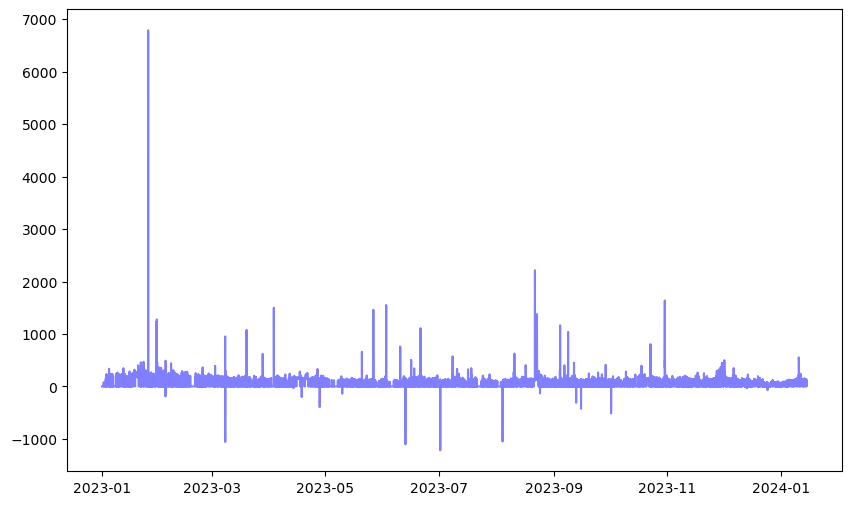

In [12]:
# Plot data for posi
plt.figure(figsize=(10, 6))
plt.plot(df_2023.index, df_2023['Price_positive_tertiary'], label='2023', color='blue', alpha=0.5)



# Outliers extraction 2023

### Highest prices

In [ ]:
quantile_2023_pos_sec = df_2023['Price_positive_secondary_2023'].quantile(1-percentile)
quantile_2023_pos_sec_low = df_2023['Price_positive_secondary_2023'].quantile(percentile)
quantile_2023_neg_sec = df_2023['Price_negative_secondary_2023'].quantile(1-percentile)
quantile_2023_neg_sec_low = df_2023['Price_negative_secondary_2023'].quantile(percentile)
quantile_2023_pos_ter = df_2023['Price_positive_tertiary_2023'].quantile(1-percentile)
quantile_2023_pos_ter_low = df_2023['Price_positive_tertiary_2023'].quantile(percentile)
quantile_2023_neg_ter = df_2023['Price_negative_tertiary_2023'].quantile(1-percentile)
quantile_2023_neg_ter_low = df_2023['Price_negative_tertiary_2023'].quantile(percentile)

df_2023_pos_sec_h = df_2023[df_2023['Price_positive_secondary_2023'] >= quantile_2023_pos_sec]
df_2023_neg_sec_h = df_2023[df_2023['Price_negative_secondary_2023'] >= quantile_2023_neg_sec]
df_2023_pos_ter_h = df_2023[df_2023['Price_positive_tertiary_2023'] >= quantile_2023_pos_ter]
df_2023_neg_ter_h = df_2023[df_2023['Price_negative_tertiary_2023'] >= quantile_2023_neg_ter]

In [ ]:
df_2023_pos_sec_h.shape, df_2023_neg_sec_h.shape, df_2023_pos_ter_h.shape, df_2023_neg_ter_h.shape

((438, 48), (444, 48), (438, 48), (438, 48))

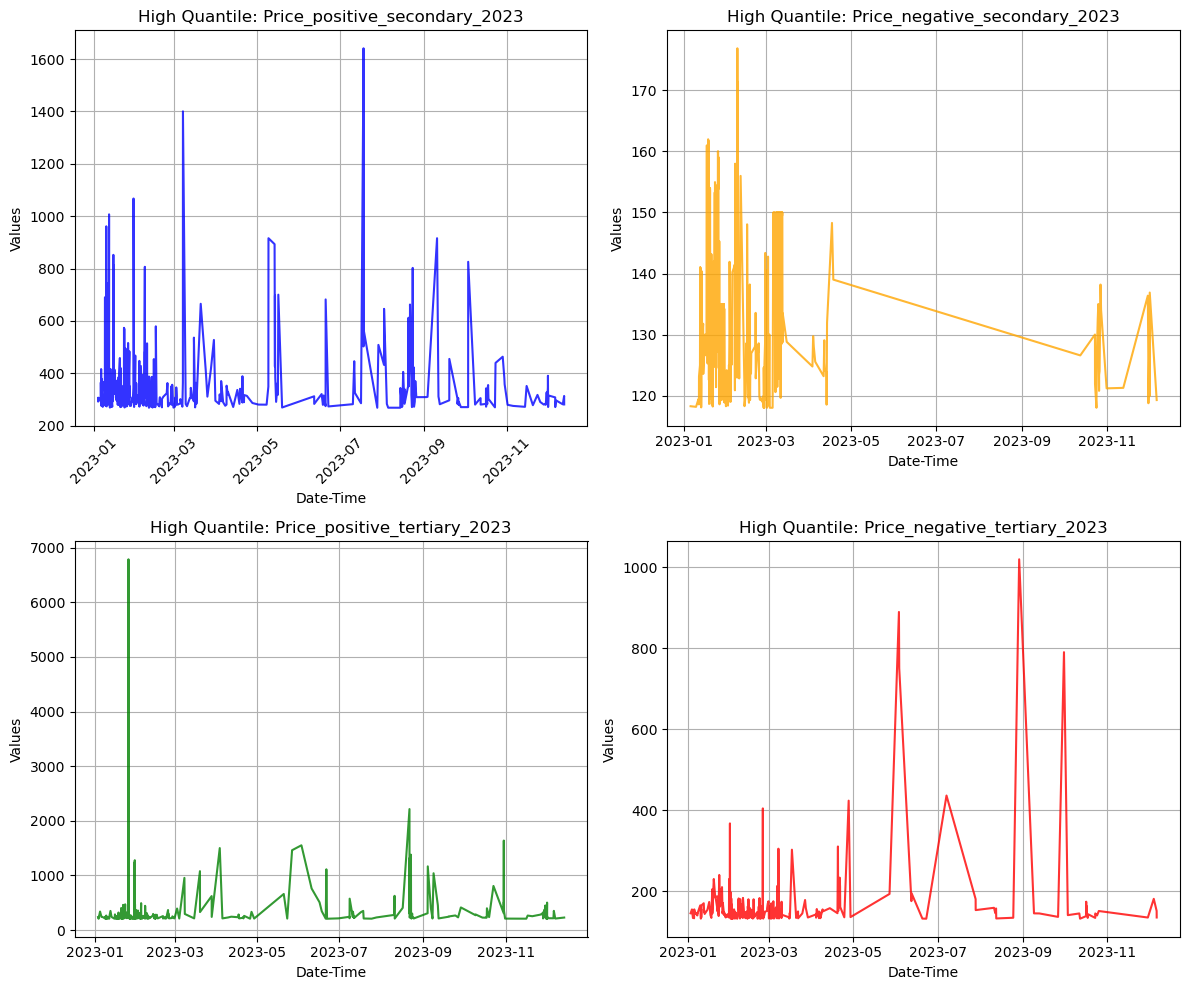

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_2023_pos_sec_h.index, 
    df_2023_pos_sec_h['Price_positive_secondary_2023'], 
    label='Price_positive_secondary_2023 (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary_2023')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_2023_neg_sec_h.index, 
    df_2023_neg_sec_h['Price_negative_secondary_2023'], 
    label='Price_negative_secondary_2023 (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary_2023')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_2023_pos_ter_h.index, 
    df_2023_pos_ter_h['Price_positive_tertiary_2023'], 
    label='Price_positive_tertiary_2023 (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary_2023')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_2023_neg_ter_h.index, 
    df_2023_neg_ter_h['Price_negative_tertiary_2023'], 
    label='Price_negative_tertiary_2023 (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary_2023')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


### Smallest Prices

In [ ]:
quantile_2023_pos_sec = df_2023['Price_positive_secondary_2023'].quantile(percentile)
quantile_2023_neg_sec = df_2023['Price_negative_secondary_2023'].quantile(percentile)
quantile_2023_pos_ter = df_2023['Price_positive_tertiary_2023'].quantile(percentile)
quantile_2023_neg_ter = df_2023['Price_negative_tertiary_2023'].quantile(percentile)

df_2023_pos_sec_l = df_2023[df_2023['Price_positive_secondary_2023'] <= quantile_2023_pos_sec]
df_2023_neg_sec_l = df_2023[df_2023['Price_negative_secondary_2023'] <= quantile_2023_neg_sec]
df_2023_pos_ter_l = df_2023[df_2023['Price_positive_tertiary_2023'] <= quantile_2023_pos_ter]
df_2023_neg_ter_l = df_2023[df_2023['Price_negative_tertiary_2023'] <= quantile_2023_neg_ter]

In [ ]:
df_2023_neg_sec_l.head()

,Unnamed: 0,Price_positive_secondary_2023,Price_negative_secondary_2023,Price_positive_tertiary_2023,Price_negative_tertiary_2023,Price_gas_2023,Imbalance netting import_2023,Imbalance netting export_2023,Energy_positive_secondary_2023_24,Energy_negative_secondary_2023_24,...,RR n 2023,Total System Imbalance 2023,Exchange_CH_AT_2023,Exchange_AT_CH_2023,Exchange_CH_DE_2023,Exchange_DE_CH_2023,Exchange_CH_FR_2023,Exchange_FR_CH_2023,Exchange_CH_IT_2023,Exchange_IT_CH_2023
2023-01-01 00:00:00,2023-01-01 00:00:00,0.0,-61.63,0.0,0.000,67.5,0.0,-21.093999,0.0,-18.685,...,0.0,26.394371,59.5,162.996,13.700,528.048,0.000,372.085,341.730,4.271
2023-01-01 08:00:00,2023-01-01 08:00:00,0.0,-45.96,0.0,-44.664,67.5,0.0,-36.554076,0.0,-23.350,...,0.0,254.383490,4.7,298.992,4.500,727.902,81.720,193.029,648.548,0.834
2023-01-01 09:00:00,2023-01-01 09:00:00,0.0,-87.73,0.0,-0.988,67.5,0.0,-61.193296,0.0,-41.391,...,0.0,266.288801,6.2,296.866,14.800,646.482,79.270,184.121,573.791,0.904
2023-01-01 10:00:00,2023-01-01 10:00:00,0.0,-77.30,0.0,-7.606,67.5,0.0,-48.614291,0.0,-34.112,...,0.0,258.717881,8.7,286.034,26.300,680.833,70.319,176.247,575.634,0.901
2023-01-01 11:00:00,2023-01-01 11:00:00,0.0,-170.94,0.0,-9.250,67.5,0.0,-168.151248,0.0,-50.896,...,0.0,350.174994,0.0,289.733,46.537,527.624,54.506,143.985,449.478,0.000


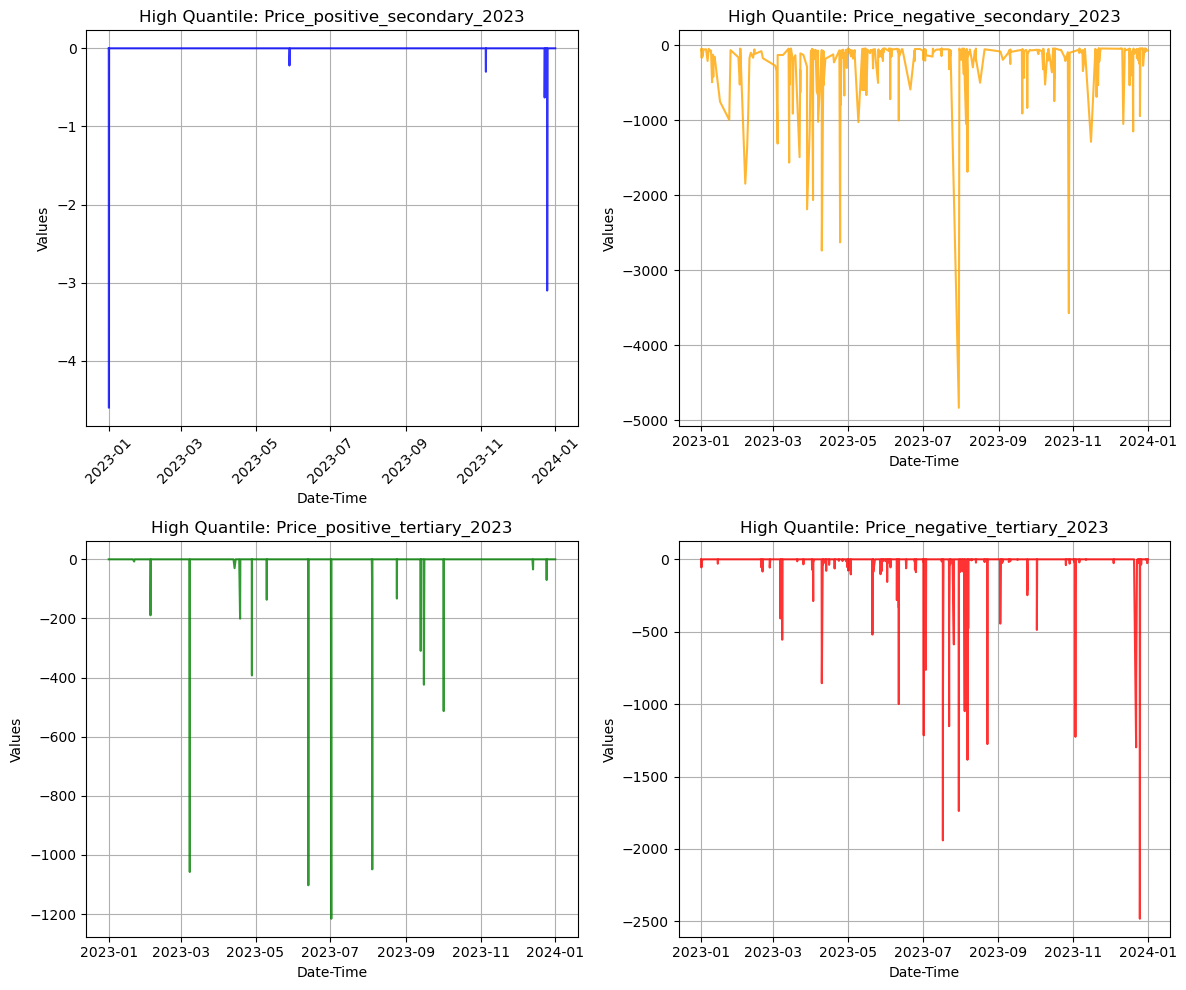

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_2023_pos_sec_l.index, 
    df_2023_pos_sec_l['Price_positive_secondary_2023'], 
    label='Price_positive_secondary_2023 (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary_2023')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_2023_neg_sec_l.index, 
    df_2023_neg_sec_l['Price_negative_secondary_2023'], 
    label='Price_negative_secondary_2023 (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary_2023')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_2023_pos_ter_l.index, 
    df_2023_pos_ter_l['Price_positive_tertiary_2023'], 
    label='Price_positive_tertiary_2023 (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary_2023')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_2023_neg_ter_l.index, 
    df_2023_neg_ter_l['Price_negative_tertiary_2023'], 
    label='Price_negative_tertiary_2023 (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary_2023')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

# Outliers extraction 2023+2 weeks 2024

In [ ]:
# Define the start and end datetime for filtering.
start_date = '2023-01-01 00:00:00'
# For hourly data, the first two weeks of 2024 run from January 1 to January 14 (inclusive).
end_date = '2024-01-14 23:00:00'

# Use .loc to slice the DataFrame based on the datetime index.
df_result = df_22_24.loc[start_date:end_date]

In [ ]:
quantile_pos_sec = df_result['Price_positive_secondary'].quantile(1-percentile)
quantile_neg_sec = df_result['Price_negative_secondary'].quantile(1-percentile)
quantile_pos_ter = df_result['Price_positive_tertiary'].quantile(1-percentile)
quantile_neg_ter = df_result['Price_negative_tertiary'].quantile(1-percentile)

df_result_pos_sec = df_result[df_result['Price_positive_secondary'] >= quantile_pos_sec]
df_result_neg_sec = df_result[df_result['Price_negative_secondary'] >= quantile_neg_sec]
df_result_pos_ter = df_result[df_result['Price_positive_tertiary'] >= quantile_pos_ter]
df_result_neg_ter = df_result[df_result['Price_negative_tertiary'] >= quantile_neg_ter]

In [ ]:
quantile_2023_pos_sec = df_result['Price_positive_secondary'].quantile(percentile)
quantile_2023_neg_sec = df_result['Price_negative_secondary'].quantile(percentile)
quantile_2023_pos_ter = df_result['Price_positive_tertiary'].quantile(percentile)
quantile_2023_neg_ter = df_result['Price_negative_tertiary'].quantile(percentile)

df_result_pos_sec_low = df_result[df_result['Price_positive_secondary'] <= quantile_2023_pos_sec]
df_result_neg_sec_low = df_result[df_result['Price_negative_secondary'] <= quantile_2023_neg_sec]
df_result_pos_ter_low = df_result[df_result['Price_positive_tertiary'] <= quantile_2023_pos_ter]
df_result_neg_ter_low = df_result[df_result['Price_negative_tertiary'] <= quantile_2023_neg_ter]

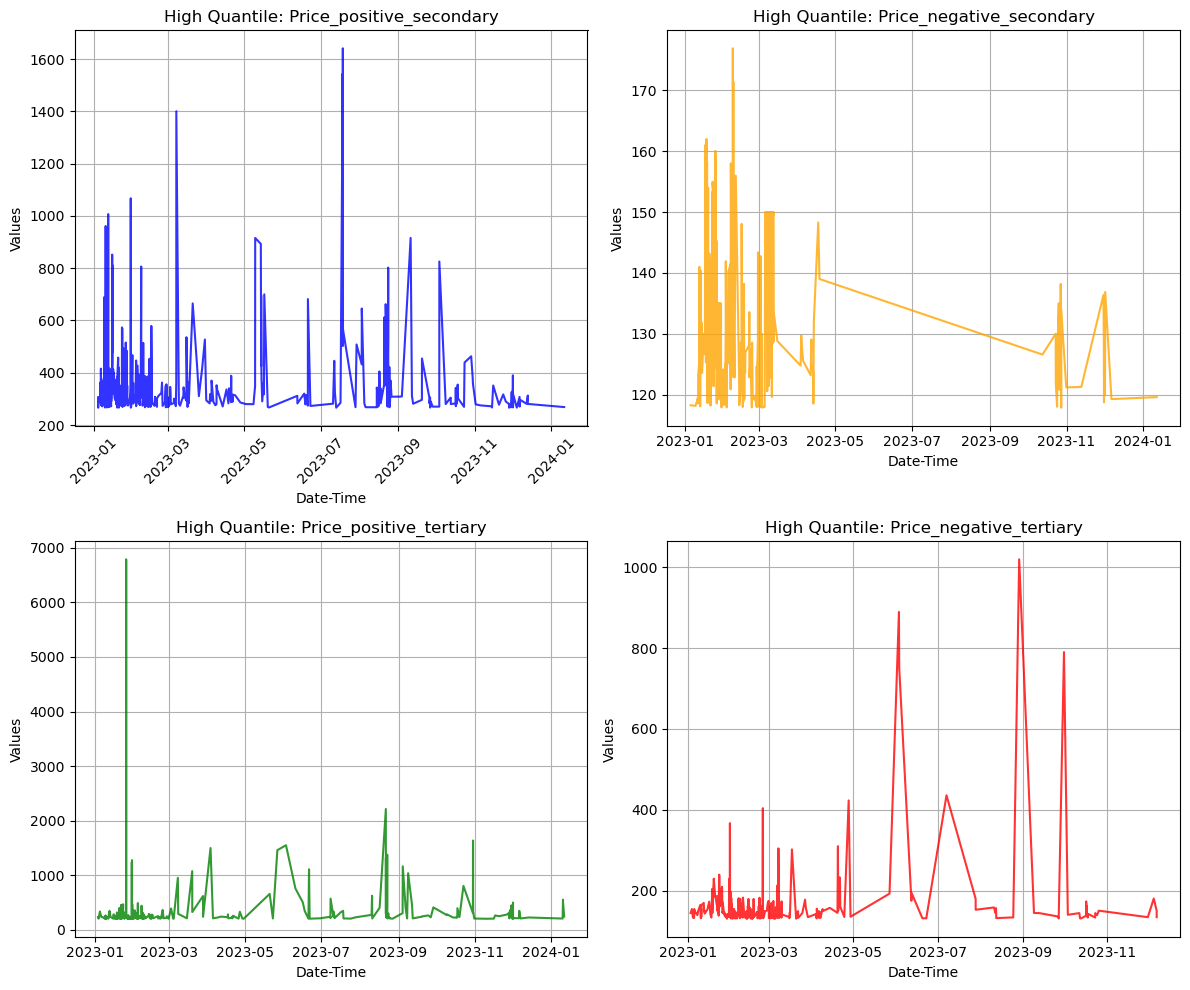

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_result_pos_sec.index, 
    df_result_pos_sec['Price_positive_secondary'], 
    label='Price_positive_secondary (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_result_neg_sec.index, 
    df_result_neg_sec['Price_negative_secondary'], 
    label='Price_negative_secondary (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_result_pos_ter.index, 
    df_result_pos_ter['Price_positive_tertiary'], 
    label='Price_positive_tertiary (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_result_neg_ter.index, 
    df_result_neg_ter['Price_negative_tertiary'], 
    label='Price_negative_tertiary (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

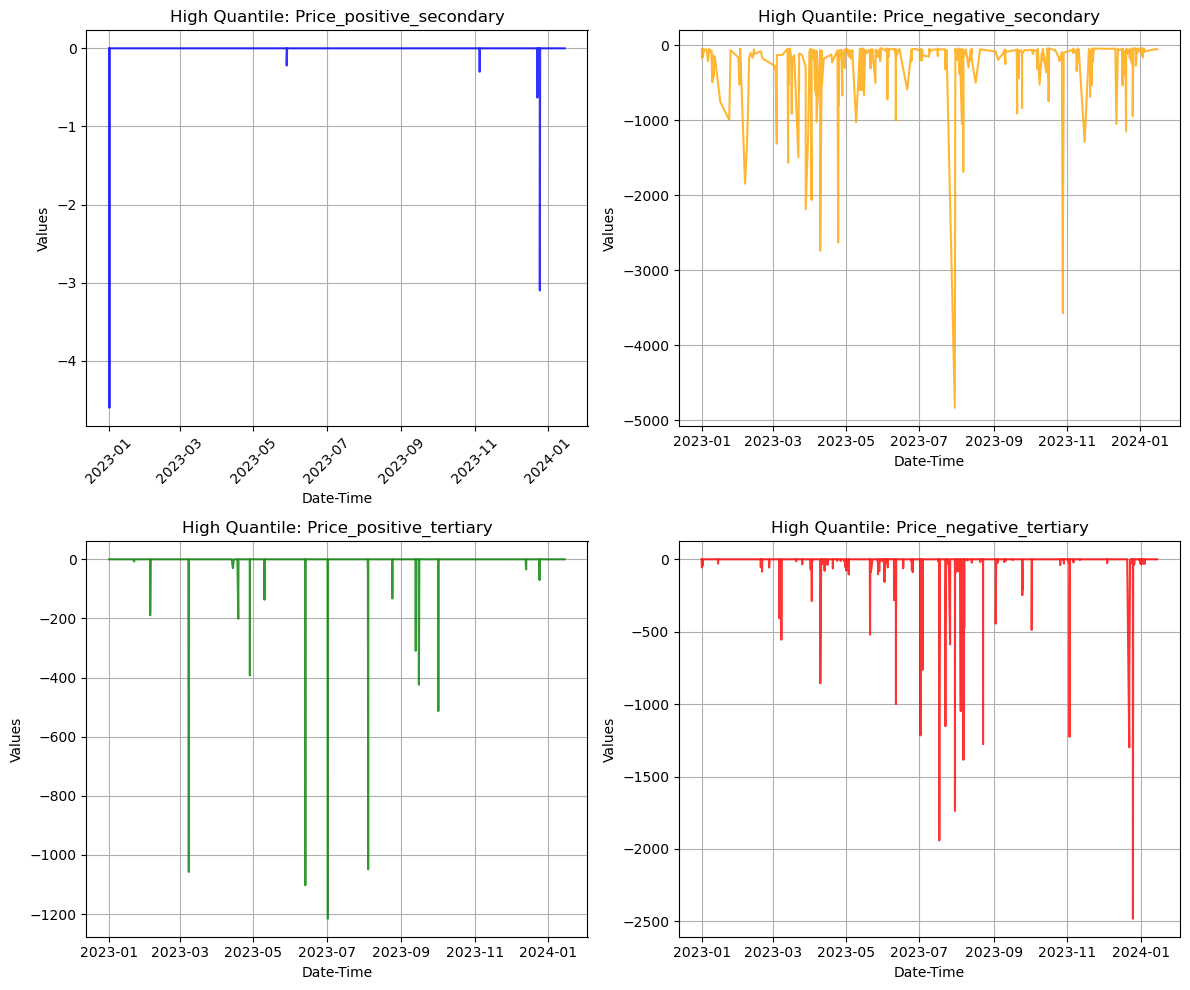

In [ ]:
# Plot negative spikes
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Plot for Price_positive_secondary_2023 (HIGH)
#
axs[0, 0].plot(
    df_result_pos_sec_low.index, 
    df_result_pos_sec_low['Price_positive_secondary'], 
    label='Price_positive_secondary (high quantile)',
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary')
axs[0, 0].set_xlabel('Date-Time')
axs[0, 0].set_ylabel('Values')
axs[0, 0].grid(True)
axs[0, 0].tick_params(axis='x', rotation=45)

#
# 2) Plot for Price_negative_secondary_2023 (HIGH)
#
axs[0, 1].plot(
    df_result_neg_sec_low.index, 
    df_result_neg_sec_low['Price_negative_secondary'], 
    label='Price_negative_secondary (high quantile)',
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary')
axs[0, 1].set_xlabel('Date-Time')
axs[0, 1].set_ylabel('Values')
axs[0, 1].grid(True)

#
# 3) Plot for Price_positive_tertiary_2023 (HIGH)
#
axs[1, 0].plot(
    df_result_pos_ter_low.index, 
    df_result_pos_ter_low['Price_positive_tertiary'], 
    label='Price_positive_tertiary (high quantile)',
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary')
axs[1, 0].set_xlabel('Date-Time')
axs[1, 0].set_ylabel('Values')
axs[1, 0].grid(True)

#
# 4) Plot for Price_negative_tertiary_2023 (HIGH)
#
axs[1, 1].plot(
    df_result_neg_ter_low.index, 
    df_result_neg_ter_low['Price_negative_tertiary'], 
    label='Price_negative_tertiary (high quantile)',
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary')
axs[1, 1].set_xlabel('Date-Time')
axs[1, 1].set_ylabel('Values')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()


In [ ]:
#Sort prices by type and level
df_pos_sec_sorted = df_result_pos_sec.sort_values(by='Price_positive_secondary', ascending=False)
df_neg_sec_sorted = df_result_neg_sec.sort_values(by='Price_negative_secondary', ascending=False)
df_pos_ter_sorted = df_result_pos_ter.sort_values(by='Price_positive_tertiary', ascending=False)
df_neg_ter_sorted = df_result_neg_ter.sort_values(by='Price_negative_tertiary', ascending=False)

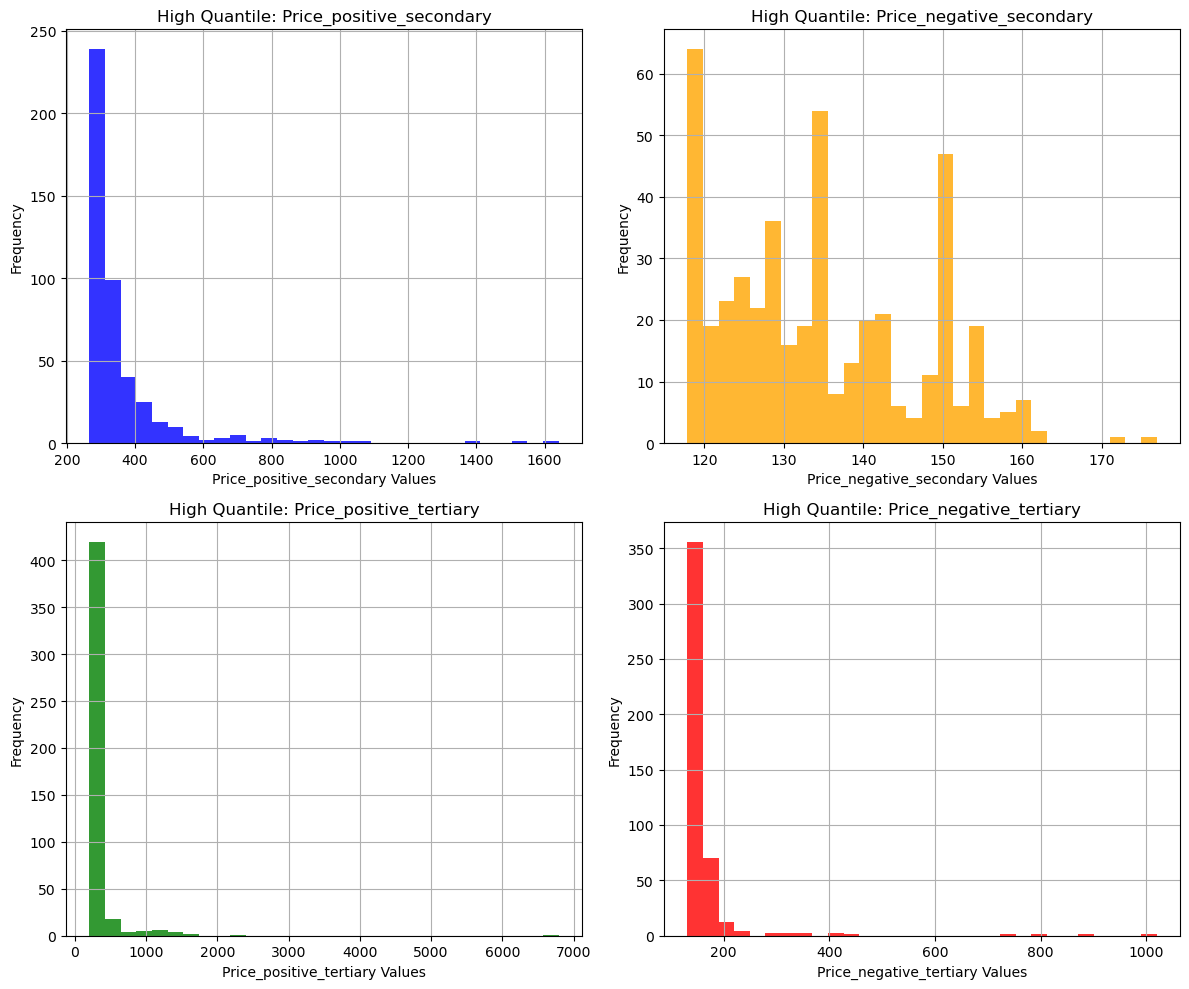

In [ ]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

#
# 1) Histogram for Price_positive_secondary (HIGH)
#
axs[0, 0].hist(
    df_pos_sec_sorted['Price_positive_secondary'], 
    bins=30,
    alpha=0.8, color='blue'
)
axs[0, 0].set_title('High Quantile: Price_positive_secondary')
axs[0, 0].set_xlabel('Price_positive_secondary Values')
axs[0, 0].set_ylabel('Frequency')
axs[0, 0].grid(True)

#
# 2) Histogram for Price_negative_secondary (HIGH)
#
axs[0, 1].hist(
    df_neg_sec_sorted['Price_negative_secondary'], 
    bins=30,
    alpha=0.8, color='orange'
)
axs[0, 1].set_title('High Quantile: Price_negative_secondary')
axs[0, 1].set_xlabel('Price_negative_secondary Values')
axs[0, 1].set_ylabel('Frequency')
axs[0, 1].grid(True)

#
# 3) Histogram for Price_positive_tertiary (HIGH)
#
axs[1, 0].hist(
    df_pos_ter_sorted['Price_positive_tertiary'], 
    bins=30,
    alpha=0.8, color='green'
)
axs[1, 0].set_title('High Quantile: Price_positive_tertiary')
axs[1, 0].set_xlabel('Price_positive_tertiary Values')
axs[1, 0].set_ylabel('Frequency')
axs[1, 0].grid(True)

#
# 4) Histogram for Price_negative_tertiary (HIGH)
#
axs[1, 1].hist(
    df_neg_ter_sorted['Price_negative_tertiary'], 
    bins=30,
    alpha=0.8, color='red'
)
axs[1, 1].set_title('High Quantile: Price_negative_tertiary')
axs[1, 1].set_xlabel('Price_negative_tertiary Values')
axs[1, 1].set_ylabel('Frequency')
axs[1, 1].grid(True)

plt.tight_layout()
plt.show()

C:\Users\sebas\AppData\Local\Temp\ipykernel_11752\2222878042.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)
C:\Users\sebas\AppData\Local\Temp\ipykernel_11752\2222878042.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)
C:\Users\sebas\AppData\Local\Temp\ipykernel_11752\2222878042.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)
C:\Users\sebas\AppData\Local\Temp\ipykernel_11752\2222878042.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)


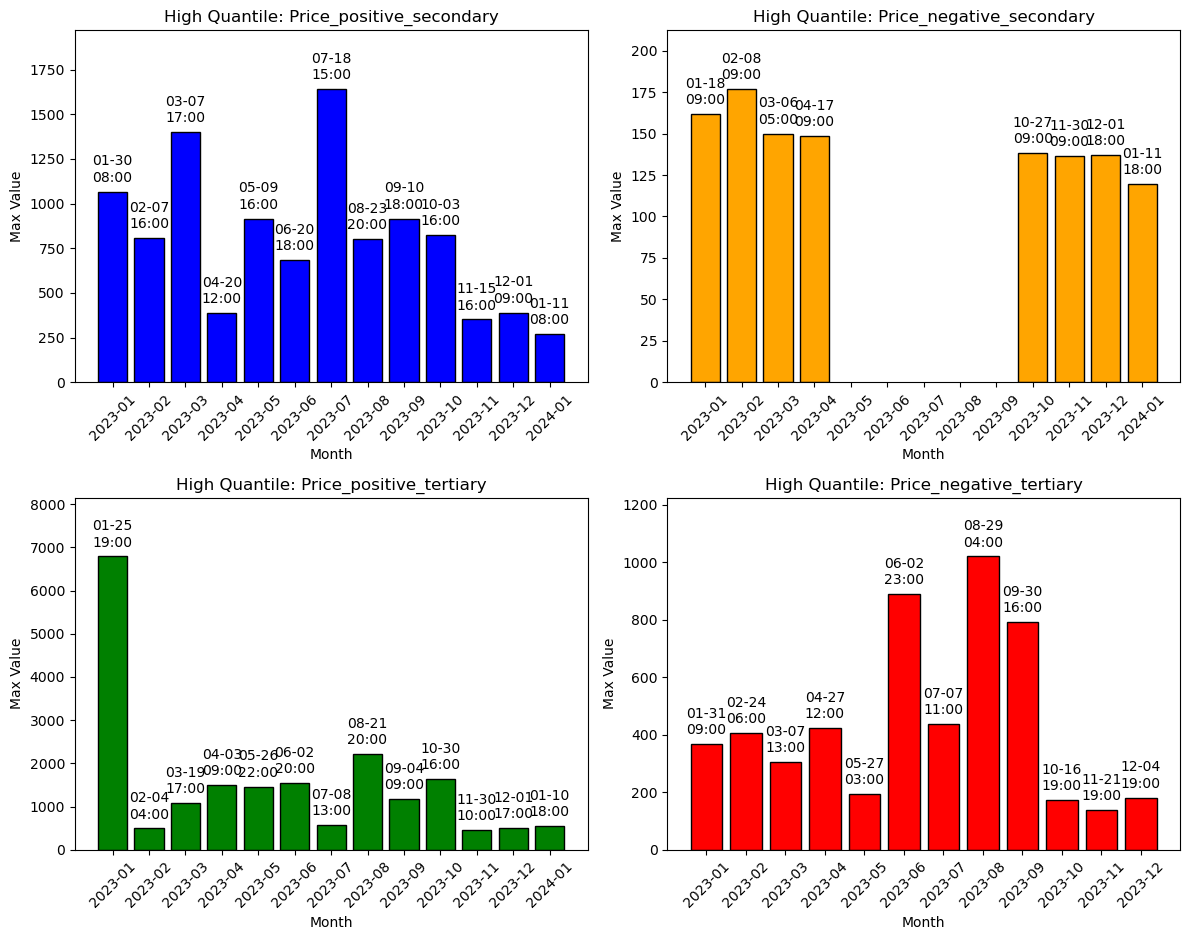

In [ ]:
def get_monthly_max(df, column):
    df.index = pd.to_datetime(df.index)
    
    def get_max_info(group):
        if group.empty:
            return pd.Series({'max_date': pd.NaT, 'max_value': None})
        max_idx = group[column].idxmax()
        return pd.Series({
            'max_date': max_idx,
            'max_value': group.loc[max_idx, column]
        })
    
    monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)
    monthly_max['month'] = monthly_max.index.strftime('%Y-%m')
    return monthly_max

def plot_monthly_max(ax, df, column, title, color):
    monthly_max = get_monthly_max(df, column)
    
    # Create bar chart
    ax.bar(monthly_max['month'], monthly_max['max_value'], color=color, edgecolor='black')
    ax.set_title(title)
    ax.set_xlabel('Month')
    ax.set_ylabel('Max Value')
    ax.tick_params(axis='x', rotation=45)
    
    # Adjust y-axis limit to leave extra space for annotations
    max_val = monthly_max['max_value'].max()
    if pd.notnull(max_val):
        ax.set_ylim(0, max_val * 1.2)
    
    # Annotate each bar with the date and hour (on two lines) where the maximum occurred.
    for _, row in monthly_max.iterrows():
        if pd.notnull(row['max_date']):
            annotation_text = row['max_date'].strftime('%m-%d\n%H:%M')
            ax.annotate(
                annotation_text,
                xy=(row['month'], row['max_value']),
                xytext=(0, 5),  # vertical offset in points
                textcoords='offset points',
                ha='center',
                va='bottom'
            )

# Example plotting code using a 2x2 subplot layout
import matplotlib.pyplot as plt

fig, axs = plt.subplots(2, 2, figsize=(12, 10))

plot_monthly_max(
    axs[0, 0], 
    df_pos_sec_sorted, 
    'Price_positive_secondary', 
    'High Quantile: Price_positive_secondary', 
    'blue'
)

plot_monthly_max(
    axs[0, 1], 
    df_neg_sec_sorted, 
    'Price_negative_secondary', 
    'High Quantile: Price_negative_secondary', 
    'orange'
)

plot_monthly_max(
    axs[1, 0], 
    df_pos_ter_sorted, 
    'Price_positive_tertiary', 
    'High Quantile: Price_positive_tertiary', 
    'green'
)

plot_monthly_max(
    axs[1, 1], 
    df_neg_ter_sorted, 
    'Price_negative_tertiary', 
    'High Quantile: Price_negative_tertiary', 
    'red'
)

# Adjust overall layout to leave space at the top so titles aren't blocked
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [ ]:
#Create list of max values for type and level
max_pos_sec = get_monthly_max(df_pos_sec_sorted, 'Price_positive_secondary')
max_neg_sec = get_monthly_max(df_neg_sec_sorted, 'Price_negative_secondary')
max_pos_ter = get_monthly_max(df_pos_ter_sorted, 'Price_positive_tertiary')
max_neg_ter = get_monthly_max(df_neg_ter_sorted, 'Price_negative_tertiary')

C:\Users\sebas\AppData\Local\Temp\ipykernel_11752\2222878042.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)
C:\Users\sebas\AppData\Local\Temp\ipykernel_11752\2222878042.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)
C:\Users\sebas\AppData\Local\Temp\ipykernel_11752\2222878042.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)
C:\Users\sebas\AppData\Local\Temp\ipykernel_11752\2222878042.py:13: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_max = df.groupby(pd.Grouper(freq='M')).apply(get_max_info)


In [ ]:
max_neg_sec

,max_date,max_value,month
2023-01-31,2023-01-18 09:00:00,162.00,2023-01
2023-02-28,2023-02-08 09:00:00,176.91,2023-02
2023-03-31,2023-03-06 05:00:00,150.00,2023-03
2023-04-30,2023-04-17 09:00:00,148.29,2023-04
2023-05-31,NaT,NaN,2023-05
2023-06-30,NaT,NaN,2023-06
2023-07-31,NaT,NaN,2023-07
2023-08-31,NaT,NaN,2023-08
2023-09-30,NaT,NaN,2023-09
2023-10-31,2023-10-27 09:00:00,138.19,2023-10


## Isolating Max Values
The objective is to extract n values around the max values each month to identify possible reasons of spike (service, political, etc). Create a CSV list of them

In [ ]:
n = 3

In [ ]:
def extract_window(df, max_timestamp, window=3):
    """
    Extract a window of rows from df around the row corresponding to max_timestamp.
    
    Parameters:
      df: DataFrame with a datetime index.
      max_timestamp: The timestamp (pd.Timestamp or str) where the max occurs.
      window: Number of rows before and after the max to include.
    
    Returns:
      A DataFrame window with an extra column for the relative position and a 'timestamp' column.
    """
    # Ensure max_timestamp is a pd.Timestamp
    max_timestamp = pd.to_datetime(max_timestamp)
    
    # Get the integer position of the max_timestamp in the datetime index.
    pos = df.index.get_loc(max_timestamp)
    
    # Determine the start and end positions (ensuring we do not go out-of-bounds)
    start = max(pos - window, 0)
    end = min(pos + window + 1, len(df))
    
    # Extract the window of rows and add a 'relative_position' column.
    window_df = df.iloc[start:end].copy()
    window_df['relative_position'] = np.arange(start, end) - pos
    
    # Reset the index and rename it to 'timestamp' so it is included in the CSV.
    window_df = window_df.reset_index().rename(columns={'index': 'timestamp'})
    return window_df

    
def compute_variations(window_df, value_col):
    """
    Compute the variation (difference) of the specified value column in the window
    relative to the max row (relative_position == 0).
    
    Parameters:
      window_df: DataFrame extracted by extract_window().
      value_col: The column name for which to compute variations.
      
    Returns:
      DataFrame with an additional 'variation' column.
    """
    # Find the value at relative position 0 (i.e., the maximum row in this window)
    max_value = window_df.loc[window_df['relative_position'] == 0, value_col].values[0]
    window_df['variation'] = window_df[value_col] - max_value
    return window_df

In [ ]:
# # Ensure the folder exists (it will create it if it doesn't)
# folder_path = "Max_per_month"
# os.makedirs(folder_path, exist_ok=True)

# # List of dataframes and corresponding file names
# data_frames = [max_pos_sec, max_neg_sec, max_pos_ter, max_pos_ter]
# file_names = [
#     "Positive_secondary.csv",
#     "Negative_secondary.csv",
#     "Positive_tertiary.csv",
#     "Negative_tertiary.csv"
# ]

# for df, file_name in zip(data_frames, file_names):
#     output_filename = os.path.join(folder_path, file_name)
#     with open(output_filename, "w", newline="") as f:
#         header_written = False
        
#         # Iterate over each unique max timestamp in the "max_id" column.
#         for max_timestamp in df['max_date']:
#             # Extract the window of rows around this max timestamp.
#             window_df = extract_window(df_result, max_timestamp, window=n)
            
#             # Write the window to the CSV, writing the header only once.
#             window_df.to_csv(f, index=False, header=not header_written)
#             header_written = True
            
#             # Write an extra blank line to separate the window blocks.
#             f.write("\n")
#     print(f"CSV file created at: {output_filename}")

# Ensure the folder exists (it will create it if it doesn't)
folder_path = "Max_per_month"
os.makedirs(folder_path, exist_ok=True)

# List of DataFrames containing monthly maximum information (must include a 'max_date' column)
# For example, these could be the outputs from your monthly aggregation.
data_frames = [max_pos_sec, max_neg_sec, max_pos_ter, max_neg_ter]
file_names = [
    "Positive_secondary.csv",
    "Negative_secondary.csv",
    "Positive_tertiary.csv",
    "Negative_tertiary.csv"
]

# List of original value columns that were used in get_monthly_max.
value_columns = ['Price_positive_secondary', 
                 'Price_negative_secondary', 
                 'Price_positive_tertiary', 
                 'Price_negative_tertiary']

# n is the window size (number of rows before and after the max row to include)
n = 3

# Loop over each monthly max DataFrame, file name, and value column.
for df_max, file_name, value_col in zip(data_frames, file_names, value_columns):
    # df_max should already contain a 'max_date' column from get_monthly_max.
    # Define output filenames for the windows and variations.
    output_filename = os.path.join(folder_path, file_name)
    variation_output_filename = os.path.join(folder_path, "Variation_" + file_name)
    
    # Open output files for windows and variations.
    with open(output_filename, "w", newline="") as f_win, open(variation_output_filename, "w", newline="") as f_var:
        header_written_win = False
        header_written_var = False
        
        # Iterate over each max_timestamp in the 'max_date' column.
        for max_timestamp in df_max['max_date']:
            # Extract window from the full time series DataFrame (df_result)
            window_df = extract_window(df_result, max_timestamp, window=n)
            # Compute variations based on the given value column.
            variation_df = compute_variations(window_df.copy(), value_col)
            
            # # Write window block to CSV and insert an extra newline after each block.
            # window_df.to_csv(f_win, index=False, header=not header_written_win)
            # header_written_win = True
            # f_win.write("         # 
            # ")
            
            # Write variations block to CSV and insert an extra newline after each block.
            variation_df.to_csv(f_var, index=False, header=not header_written_var)
            header_written_var = True
            f_var.write("\n")
    
    print(f"CSV files created: {output_filename} and {variation_output_filename}")

CSV files created: Max_per_month\Positive_secondary.csv and Max_per_month\Variation_Positive_secondary.csv


KeyError: NaT

In [ ]:
windows_pos_sec = []
windows_neg_sec = []
windows_pos_ter = []
windows_neg_ter = []

for max_timestamp in max_pos_sec['max_date']:
    window_df = extract_window(df_result, max_timestamp, window=n)
    windows_pos_sec.append(window_df)

for max_timestamp in max_neg_sec['max_date']:
    window_df = extract_window(df_result, max_timestamp, window=n)
    windows_neg_sec.append(window_df)

for max_timestamp in max_pos_ter['max_date']:
    window_df = extract_window(df_result, max_timestamp, window=n)
    windows_pos_ter.append(window_df)

for max_timestamp in max_neg_ter['max_date']:
    window_df = extract_window(df_result, max_timestamp, window=n)
    windows_neg_ter.append(window_df)

df_pos_sec = pd.concat(windows_pos_sec)
df_neg_sec = pd.concat(windows_neg_sec)
df_pos_ter = pd.concat(windows_pos_ter)
df_neg_ter = pd.concat(windows_neg_ter)

In [ ]:
df_pos_sec.tail()

,timestamp,Price_positive_secondary,Price_negative_secondary,Price_positive_tertiary,Price_negative_tertiary,Price_gas,Imbalance netting import,Imbalance netting export,Energy_positive_secondary,Energy_negative_secondary,...,Total System Imbalance,Exchange_CH_AT,Exchange_AT_CH,Exchange_CH_DE,Exchange_DE_CH,Exchange_CH_FR,Exchange_FR_CH,Exchange_CH_IT,Exchange_IT_CH,relative_position
2,2023-12-01 08:00:00,345.75,0.00,0.000,0.0,41.6,83.180508,0.000000,69.402,0.000,...,-173.959002,154.780,14.6,750.633,44.6,354.664,74.855,33.800,241.820,-1
3,2023-12-01 09:00:00,390.19,0.00,198.064,0.0,41.6,14.696239,0.000000,51.773,0.000,...,-231.065157,172.621,9.8,888.451,53.1,476.466,63.775,38.871,265.286,0
4,2023-12-01 10:00:00,328.77,0.00,265.489,0.0,41.6,0.000000,-1.617746,26.193,0.000,...,-273.851272,132.600,41.9,925.577,45.6,540.132,58.418,38.556,242.535,1
5,2023-12-01 11:00:00,267.54,129.33,430.614,0.0,41.6,0.000000,-63.209042,6.889,0.044,...,-183.822693,100.428,54.2,844.645,45.6,520.633,60.052,32.942,217.003,2
6,2023-12-01 12:00:00,270.80,135.31,220.118,0.0,41.6,23.418456,0.000000,6.592,0.108,...,-358.012364,113.608,47.3,857.189,43.8,474.653,66.270,19.222,319.488,3
